# autoGluon
- Sara Echeverría 21371
- Ricardo Mendez 21289

Repository link: https://github.com/bl33h/autoGluon

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

In [2]:
# load the dataset from the csv file
def loadData(fileName):
    return pd.read_csv(fileName)

In [3]:
# obtain basic descriptive statistics and visualize distributions
def exploreData(data):
    # print basic descriptive statistics
    print(data.describe())
    
    # visualize the distribution of each variable
    for column in data.columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(data[column], kde=True, bins=30)
        plt.title('Distribution of ' + column)
        plt.show()

# check for missing values and handle them
def handleMissingValues(data):
    # check for missing values
    print("!missing values before handling:", data.isnull().sum())
    
    # fill missing values with the median of each column as an example
    data.fillna(data.median(), inplace=True)
    
    # print missing values after handling to confirm no missing data
    print("!missing values after handling:", data.isnull().sum())
    return data

In [4]:
# train models with AutoGluon
def trainModels(data):
    label = 'Outcome'  # specify the target variable
    savePath = './models'  # specify where to save the trained models
    
    predictor = TabularPredictor(label=label, path=savePath, eval_metric='accuracy').fit(
        data,
        presets='best_quality'
    )
    return predictor

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

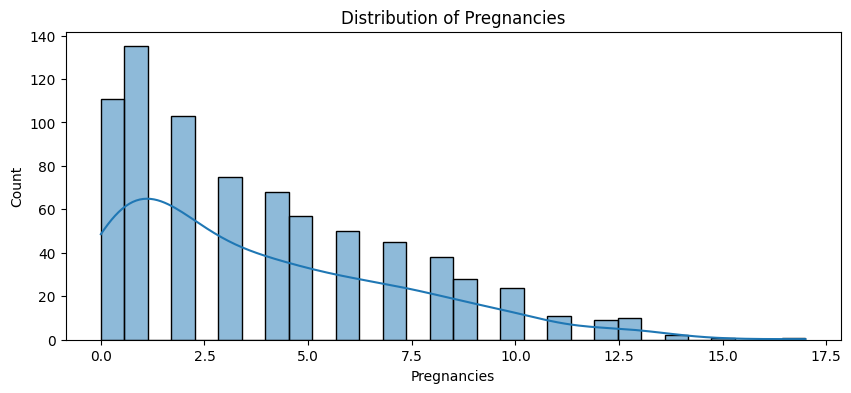

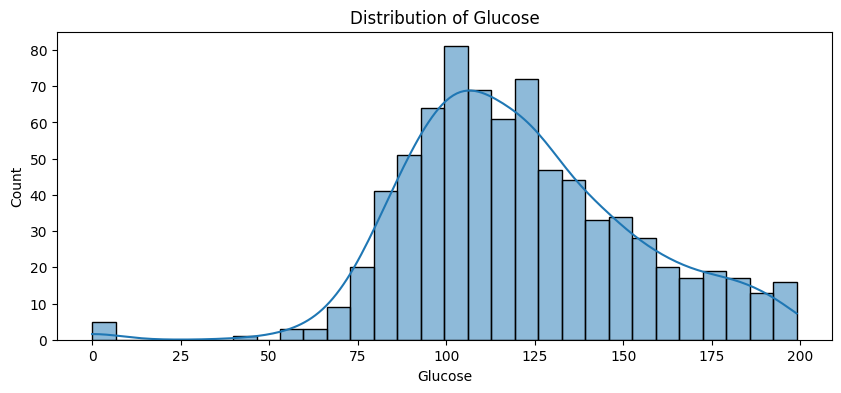

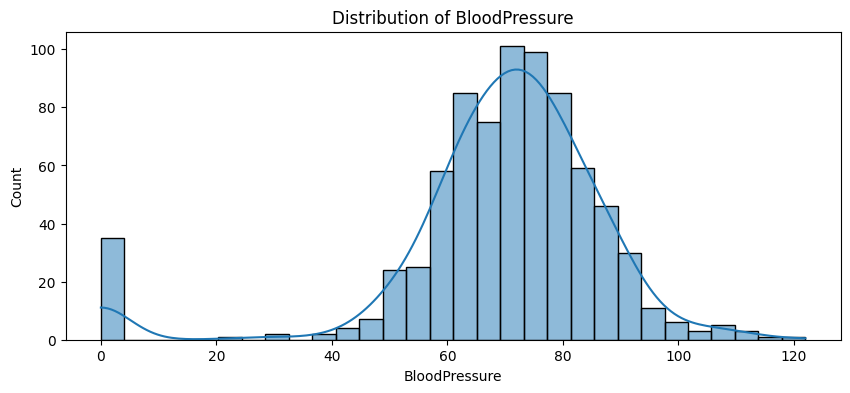

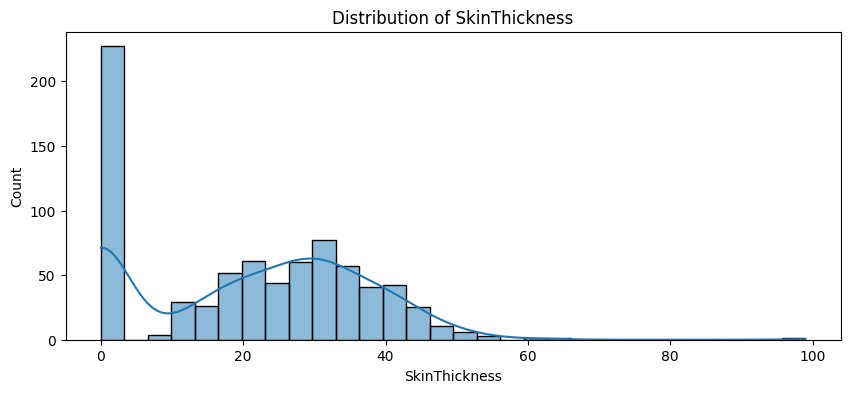

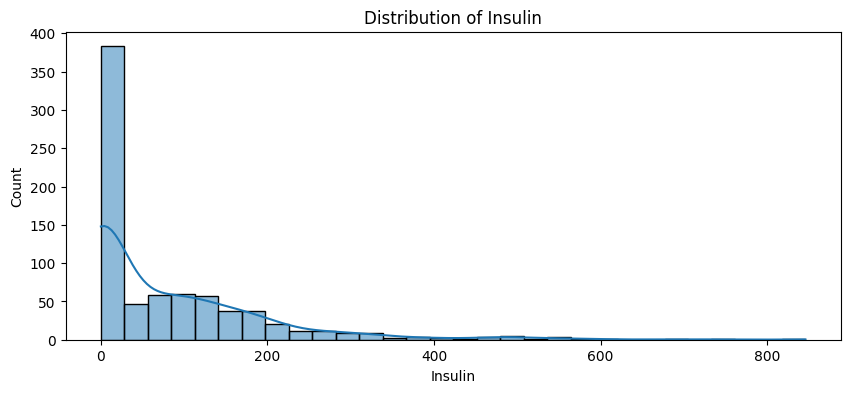

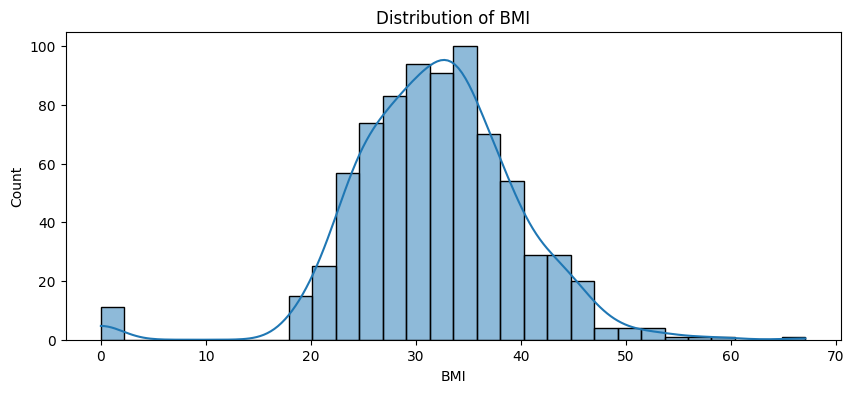

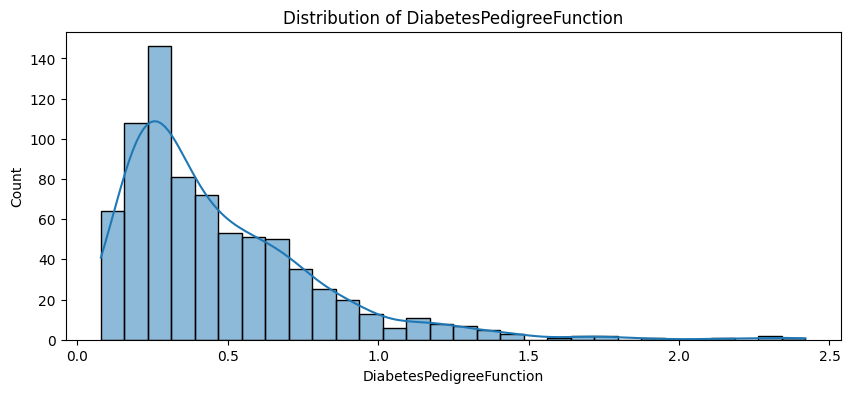

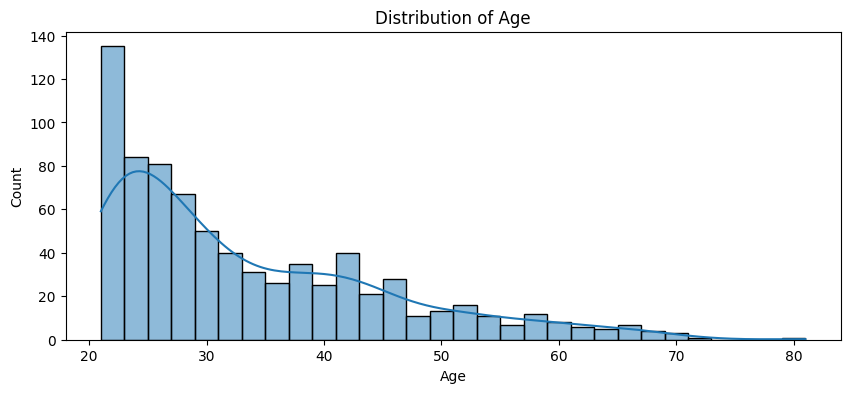

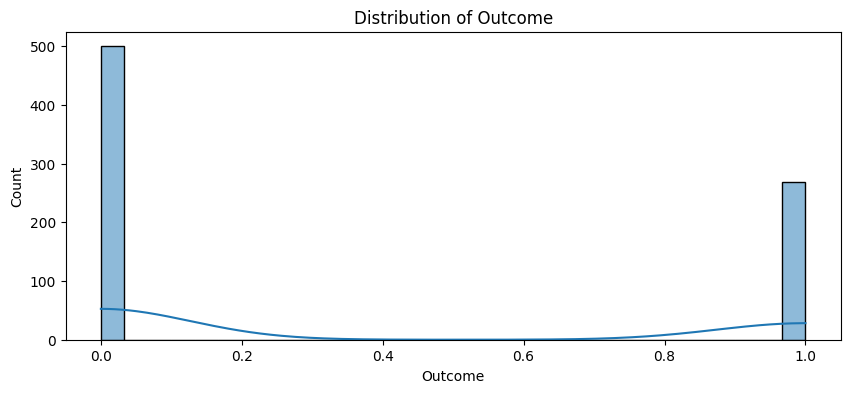

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       2.44 GB / 15.69 GB (15.6%)
Disk Space Avail:   144.77 GB / 475.45 GB (30.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up t

!missing values before handling: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
!missing values after handling: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
C:\Users\sarap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\autogluon\tabular\predictor\predictor.py:1242: UserWarning: Failed to use ray for memory safe fits. Falling back to normal fit. Error: OSError(0, 'AssignProcessToJobObject() failed')
  stacked_overfitting = self._sub_fit_memory_save_wrapper(
		Context path: "./models\ds_sub_fit\sub_fit_ho"
Running DyStack sub-fit ...
Beginning AutoGluon training ... Time limit = 892s
AutoGluon will save models to "./models\ds_sub_fit\sub_fit_ho"
Train Data Rows:    682
Train Data Columns: 8
Label Column:       Outcome
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data 

                       model  score_val eval_metric  pred_time_val   fit_time  \
0        WeightedEnsemble_L2   0.781250    accuracy       0.416179   4.217359   
1        WeightedEnsemble_L3   0.781250    accuracy       0.417252   3.884187   
2      ExtraTrees_r49_BAG_L1   0.769531    accuracy       0.113481   1.292103   
3      ExtraTreesGini_BAG_L1   0.769531    accuracy       0.137633   0.985214   
4     ExtraTrees_r126_BAG_L1   0.768229    accuracy       0.278546   2.754995   
5   RandomForest_r166_BAG_L1   0.766927    accuracy       0.117985   1.602213   
6     ExtraTrees_r172_BAG_L1   0.765625    accuracy       0.090029   0.789666   
7      ExtraTreesEntr_BAG_L1   0.765625    accuracy       0.105619   0.966189   
8    RandomForestGini_BAG_L1   0.764323    accuracy       0.249929   1.052781   
9       ExtraTrees_r4_BAG_L1   0.763021    accuracy       0.089140   0.880520   
10  RandomForest_r127_BAG_L1   0.763021    accuracy       0.107320   1.635319   
11    ExtraTrees_r178_BAG_L1

In [5]:
# main function to run the processes
def main():
    # load data
    data = loadData('data/diabetes.csv')
    
    # perform exploratory data analysis
    exploreData(data)
    
    # handle missing values
    data = handleMissingValues(data)
    
    # train models and obtain a predictor
    predictor = trainModels(data)
    
    # summarize what models were trained
    leaderboard = predictor.leaderboard()
    print(leaderboard)

if __name__ == '__main__':
    main()